In [1]:
cd C:\Users\tul18813\Desktop\BigGeo\AppDev\data

C:\Users\tul18813\Desktop\BigGeo\AppDev\data


In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is D2FF-7C7B

 Directory of C:\Users\tul18813\Desktop\BigGeo\AppDev\data

03/15/2024  12:01 AM    <DIR>          .
03/15/2024  12:01 AM    <DIR>          ..
02/13/2024  12:00 AM    <DIR>          .ipynb_checkpoints
03/14/2024  02:32 PM                 5 cb_2018_us_county_500k.cpg
03/14/2024  02:32 PM           527,301 cb_2018_us_county_500k.dbf
03/14/2024  02:32 PM               165 cb_2018_us_county_500k.prj
03/14/2024  02:32 PM        16,869,220 cb_2018_us_county_500k.shp
03/14/2024  02:32 PM            21,756 cb_2018_us_county_500k.shp.ea.iso.xml
03/14/2024  02:32 PM            35,636 cb_2018_us_county_500k.shp.iso.xml
03/14/2024  02:32 PM            25,964 cb_2018_us_county_500k.shx
02/21/2024  08:09 PM                 5 cb_2022_us_tract_500k.cpg
02/21/2024  08:09 PM        40,463,325 cb_2022_us_tract_500k.dbf
02/21/2024  08:09 PM               165 cb_2022_us_tract_500k.prj
02/21/2024  08:09 PM        82,323,812 cb_2022_us_tract_5

In [2]:
import rasterio
import fiona

In [4]:
nlcd_file = 'nlcd_tcc_conus_2021_v2021-4.tif'
nlcd_dataset = rasterio.open(nlcd_file)

In [6]:
import geopandas as gpd

county_shapefile = 'county.shp'
county_gdf = gpd.read_file(county_shapefile)

In [16]:
county_name = input("Enter the name of the county: ")

# Filter the states GeoDataFrame based on the user input
selected_county = county_gdf[county_gdf['NAME'] == county_name]

Enter the name of the county:  Philadelphia


In [17]:
from rasterio.mask import mask

# Extract the geometry of the selected state
geometry = selected_county.geometry.values[0]

# Clip the NLCD dataset based on the geometry of the selected state
clipped_nlcd, _ = mask(nlcd_dataset, [geometry], crop=True)

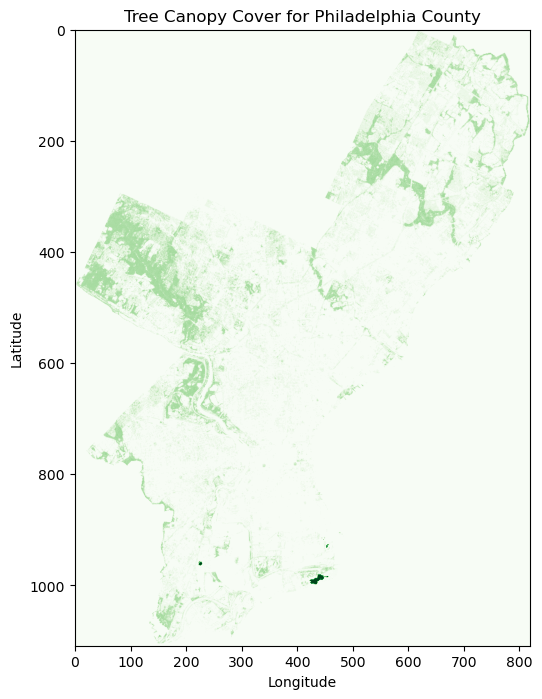

In [18]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Visualize the clipped NLCD data
show(clipped_nlcd, ax=ax, cmap='Greens')

# Add title
ax.set_title('Tree Canopy Cover for {} County'.format(county_name))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()